In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function

# Load Data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Checkout the data

The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image.

In [ ]:
from keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


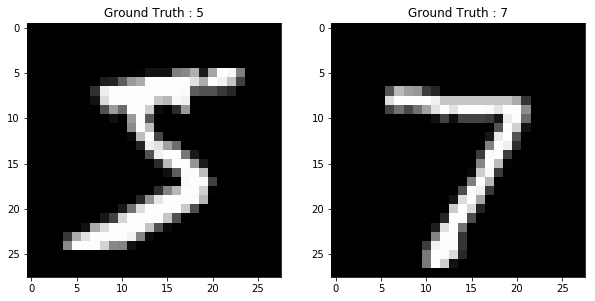

In [64]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


# Process the data

* The images are grayscale and the pixel values range from 0 to 255.
* Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
* We convert the data to float and **scale** the values between 0 to 1.
* We also convert the labels from integer to **categorical ( one-hot ) encoding** since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the number. For example, using a one-hot encoding of 10 classes, the integer 5 will be encoded as 0000010000

In [4]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [5]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [6]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [7]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [8]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# Create the network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# Configure the Network

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Network

In [11]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s - loss: 0.2745 - acc: 0.9149 - val_loss: 0.1429 - val_acc: 0.9530
Epoch 2/20
60000/60000 [==============================] - 10s - loss: 0.0939 - acc: 0.9711 - val_loss: 0.1002 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 10s - loss: 0.0581 - acc: 0.9820 - val_loss: 0.0710 - val_acc: 0.9773
Epoch 4/20
60000/60000 [==============================] - 10s - loss: 0.0410 - acc: 0.9867 - val_loss: 0.0722 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 0.0286 - acc: 0.9912 - val_loss: 0.0852 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 8s - loss: 0.0217 - acc: 0.9927 - val_loss: 0.0809 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 8s - loss: 0.0175 - acc: 0.9947 - val_loss: 0.0714 - val_acc: 0.9824
Epoch 8/20
60000/60000 [==============================] - 

# Plot the loss and accuracy curves

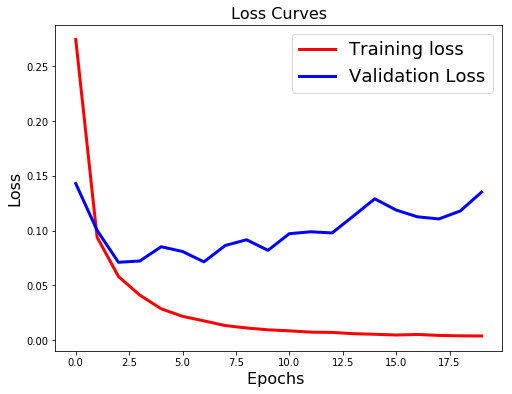

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

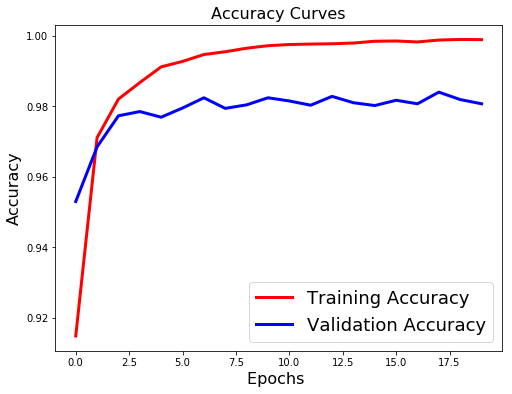

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Evaluate the trained network on test data

In [14]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

 9664/10000 [===========================>..] - ETA: 0s

In [ ]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Create a new network with Dropout Regularization

In [30]:
from keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [31]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s - loss: 0.3810 - acc: 0.8806 - val_loss: 0.1470 - val_acc: 0.9536
Epoch 2/20
60000/60000 [==============================] - 10s - loss: 0.1703 - acc: 0.9481 - val_loss: 0.1151 - val_acc: 0.9648
Epoch 3/20
60000/60000 [==============================] - 11s - loss: 0.1329 - acc: 0.9602 - val_loss: 0.0857 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 10s - loss: 0.1106 - acc: 0.9672 - val_loss: 0.0838 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 10s - loss: 0.0990 - acc: 0.9711 - val_loss: 0.0728 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 10s - loss: 0.0867 - acc: 0.9738 - val_loss: 0.0783 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 9s - loss: 0.0837 - acc: 0.9758 - val_loss: 0.0736 - val_acc: 0.9817
Epoch 8/20
60000/60000 [==============================]

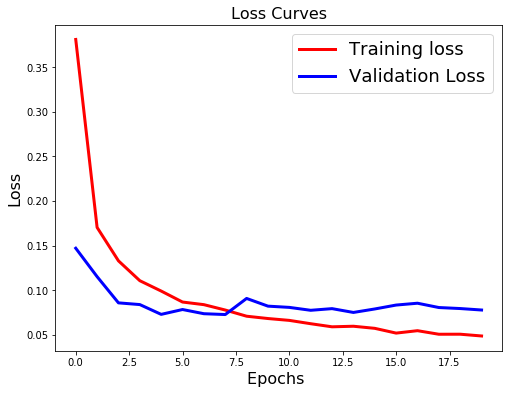

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

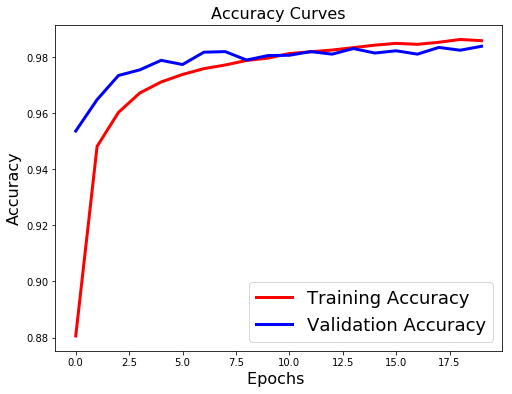

In [34]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [35]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)

 9920/10000 [============================>.] - ETA: 0s

In [ ]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Predict the first image from test data

We have seen that the first image is the number 7. Let us predict using the model

In [57]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[  1.46786899e-23,   1.73912635e-15,   3.05286026e-12,
          3.48179753e-12,   2.16374247e-22,   3.82367185e-19,
          2.31083363e-30,   1.00000000e+00,   2.78843536e-18,
          1.55856298e-14]], dtype=float32)

In [58]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

1/1 [==============================] - 0s


array([7])